# Taylor Expansion
The [Taylor Series](https://en.wikipedia.org/wiki/Taylor_series) of a function is the infinite sum of terms that are expressed in terms of the function's derivative **at a single point**. 

<br />

$$
\begin{align}
f(x) &= \sum\limits_{n=0}^\infty  \frac{(x - a)^{n}}{n!} \cdot f^{n}(a) \\
\end{align}
$$

<br />

Expanding this in the first few terms, 

<br />

$$
\begin{align}
f(x) &= f(a) + (x - a) \cdot f'(a) + \frac{(x - a)^{2}}{2!} \cdot f''(a) + \frac{(x - a)^{3}}{3!} \cdot f'''(a) + \epsilon
\end{align}
$$

<br />

In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
sns.set_theme()

## f(x) = sin(x)
My favorite illustration of a taylor series is a simple sinusoidal wave near the origin (_x=0_).

In [2]:
x_min = -5
x_max = 5
n = 500

In [3]:
x = np.linspace(x_min, x_max, num=n)

In [4]:
f = np.sin(x)

In [5]:
df = pd.DataFrame({
    'x': x,
    'f': f,
})

df.head()

,x,f
0,-5.00000,0.958924
1,-4.97996,0.964416
2,-4.95992,0.969520
3,-4.93988,0.974235
4,-4.91984,0.978559


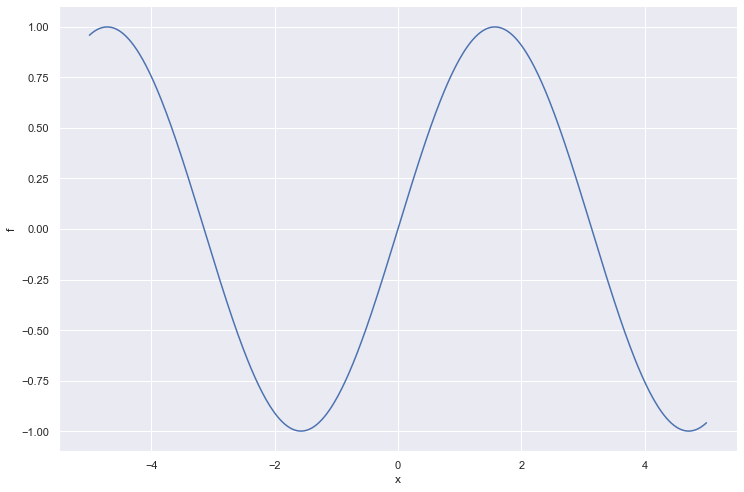

In [6]:
_ = sns.relplot(
    data=df,
    x='x',
    y='f',
    kind='line',
    height=7,
    aspect=1.5
)

We can calculate the first few derivates of _f(x)_ and evaluate _f(x)_ and _f'(x)_ near the origin (_x=0_), 

<br />

$$
\begin{align}
f(x) &= \sin{x} && f(0) = \sin{0} = 0 \\
f'(x) &= \cos{x} && f'(0) = \cos{0} = 1 \\
f''(x) &= -\sin{x} \\
f^{3}(x) &= -\cos{x} \\
f^{4}(x) &= \sin{x} \\
\end{align}
$$

<br />

Plugging these values into the first few terms of the taylor series we have, 

<br />

$$
\begin{align}
f(x) &= f(0) + (x - 0) \cdot f'(0) + \frac{(x - 0)^{2}}{2!} \cdot f''(0) + \frac{(x - 0)^{3}}{3!} \cdot f^{3}(0) + \frac{(x - 0)^{4}}{4!} \cdot f^{4}(0) + ... \\
\end{align}
$$

<br />

Or, 

$$
\begin{align}
f(x) &= x - \frac{x^{3}}{3!} + \frac{x^{5}}{5!} - \frac{x^{7}}{7!} + \frac{x^{9}}{9!} + ... \\
\end{align}
$$

<br />

In [7]:
df = pd.DataFrame({
    'x': x,
    'f': f,
})

df['f_first_term']  = x

df['f_second_term'] = df['f_first_term']  - x**3 * (1/ np.math.factorial(3))

df['f_third_term']  = df['f_second_term'] + x**5 * (1/ np.math.factorial(5))

df['f_fourth_term'] = df['f_third_term']  - x**7 * (1/ np.math.factorial(7))

df['f_fifth_term']  = df['f_fourth_term'] + x**9 * (1/ np.math.factorial(9))

df.head()

,x,f,f_first_term,f_second_term,f_third_term,f_fourth_term,f_fifth_term
0,-5.00000,0.958924,-5.00000,15.833333,-10.208333,5.292659,-0.089630
1,-4.97996,0.964416,-4.97996,15.603875,-9.920081,5.151208,-0.040014
2,-4.95992,0.969520,-4.95992,15.376417,-9.638096,5.013741,0.007533
3,-4.93988,0.974235,-4.93988,15.150950,-9.362285,4.880145,0.053067
4,-4.91984,0.978559,-4.91984,14.927468,-9.092560,4.750309,0.096640


In [8]:
df_melted = pd.melt(df, ['x'])
df_melted

,x,variable,value
0,-5.00000,f,0.958924
1,-4.97996,f,0.964416
2,-4.95992,f,0.969520
3,-4.93988,f,0.974235
4,-4.91984,f,0.978559
...,...,...,...
2995,4.91984,f_fifth_term,-0.096640
2996,4.93988,f_fifth_term,-0.053067
2997,4.95992,f_fifth_term,-0.007533
2998,4.97996,f_fifth_term,0.040014


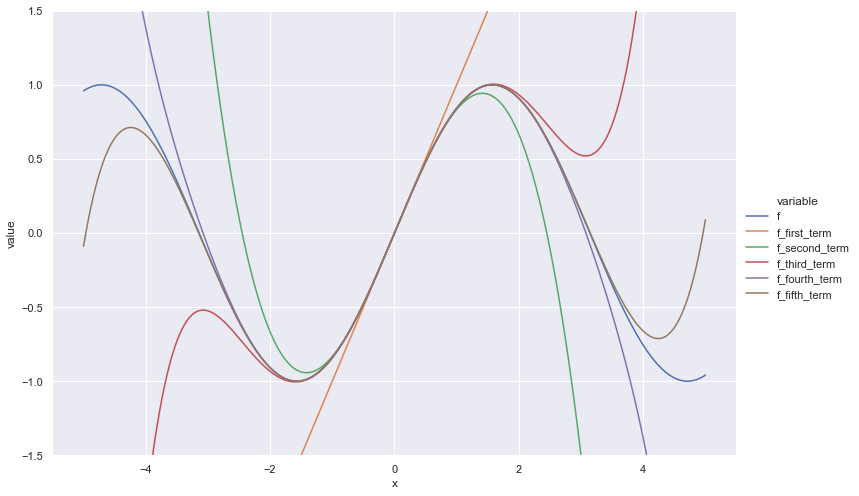

In [9]:
_ = sns.relplot(
    data=df_melted,
    x='x',
    y='value',
    hue='variable',
    kind='line',
    height=7,
    aspect=1.5
    
).set(
    ylim=(-1.5, 1.5),
)